In [1]:
import numpy as np
import xarray as xr
import proplot as plot
from netCDF4 import Dataset
import cmaps
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


Bad key "text.kerning_factor" on line 4 in
/home/zwtd/miniconda3/envs/metenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/home/zwtd/miniconda3/envs/metenv/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]


In [2]:
ds = xr.open_dataset('Z_NAFP_C_BABJ_20210426160609_P_HRCLDAS_RT_CHN_0P01_HOR-TAIR-2021042616.GRB2',engine='cfgrib')
ds

<xarray.Dataset>
Dimensions:            (latitude: 4500, longitude: 7000)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  int64 ...
  * latitude           (latitude) float64 15.03 15.04 15.05 ... 60.0 60.01 60.02
  * longitude          (longitude) float64 70.03 70.04 70.05 ... 140.0 140.0
    valid_time         datetime64[ns] ...
Data variables:
    t2m                (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             babj
    GRIB_centreDescription:  Beijing 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Beijing 
    history:                 2021-04-27T14:59:15 GRIB to CDM+CF via cfgrib-0....

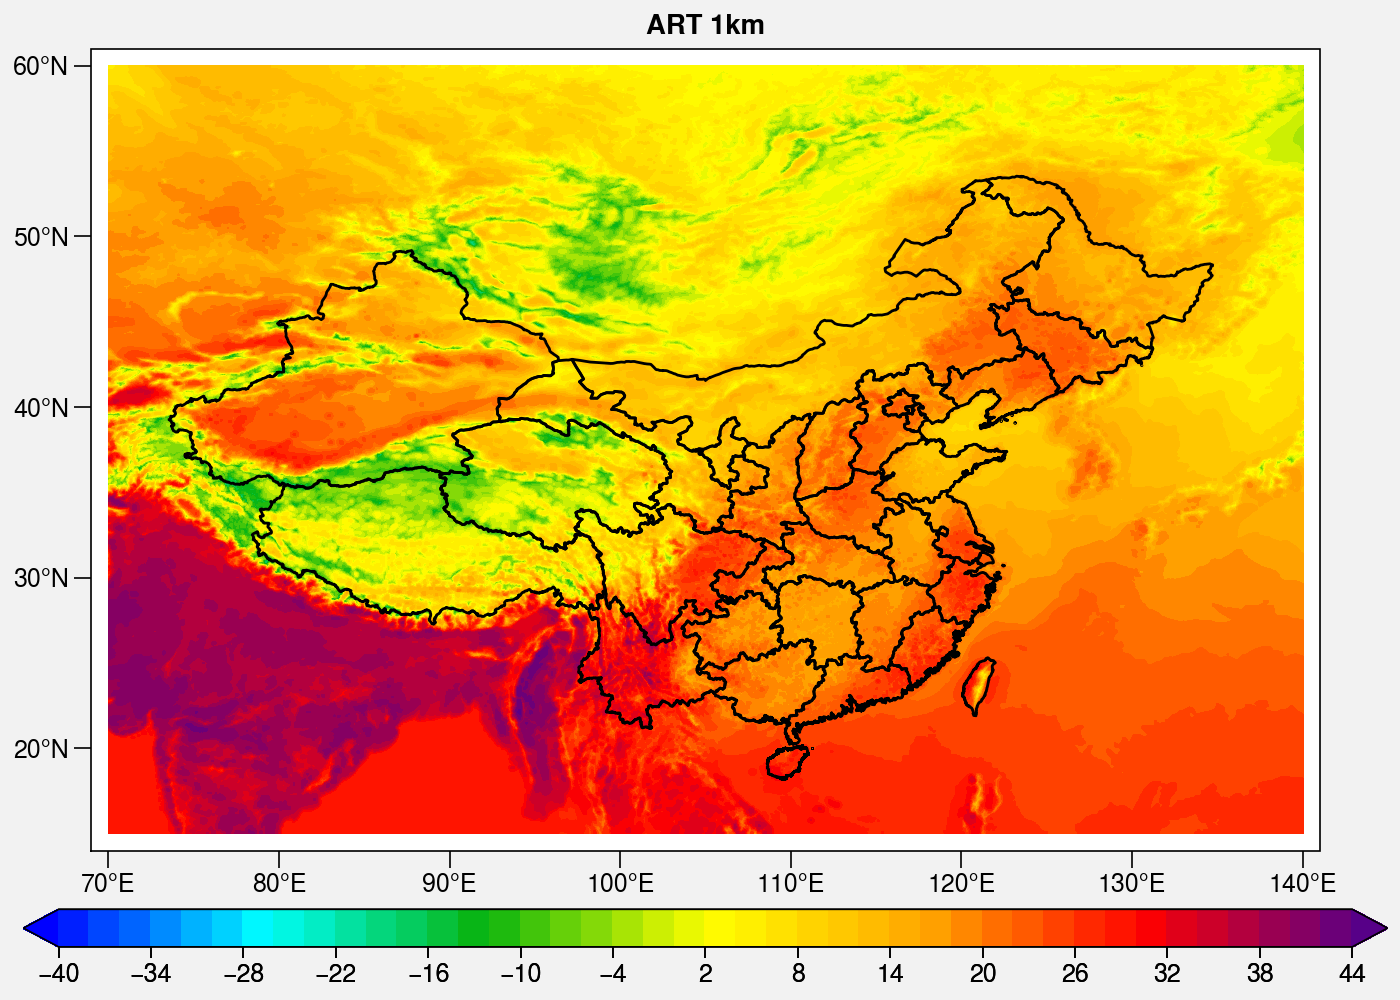

In [3]:
f, axs = plot.subplots(ncols=1, nrows=1, figsize=(7,5),proj='pcarree' )
axs.format(
    labels=False,latlines=10, lonlines=10,grid=False,#  
    suptitle='ART 1km'
)


im = axs[0].contourf(ds.longitude, ds.latitude, ds.t2m - 273.15,levels=51, cmap=cmaps.BlAqGrYeOrReVi200, extend='both')
axs[0].colorbar(im, loc='b', length=1)
fname = '/home/zwtd/.local/share/cartopy/shapefiles/natural_earth/cnshp/chn_admbnda_adm1_ocha_2020.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none',edgecolor='k',lw=1)

axs.add_feature(shape_feature)
axs.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
axs.yaxis.set_major_formatter(LatitudeFormatter())
axs.set_xticks(axs._get_lonticklocs(which='major'))
axs.set_yticks(axs._get_latticklocs(which='major'))
axs.xaxis.set_tick_params(length=6)
axs.yaxis.set_tick_params(length=6)

axs.set_extent([69,141,14,61])